In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Load data

In [2]:
# Load road accident data
df_accidents_injured_2010 = pd.read_excel('data/road_accidents_injury_severity.xlsx', sheet_name='2010')
df_accidents_injured_2011 = pd.read_excel('data/road_accidents_injury_severity.xlsx', sheet_name='2011')
df_accidents_injured_2012 = pd.read_excel('data/road_accidents_injury_severity.xlsx', sheet_name='2012')

df_accidents_injured_2010.info()
df_accidents_injured_2010.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Districts                   26 non-null     object 
 1   Deaths Male                 26 non-null     float64
 2   Deaths Female               26 non-null     float64
 3   Grievous Injury Male        26 non-null     float64
 4   Grievous Injury Female      26 non-null     float64
 5   Non Grievous Injury Male    26 non-null     float64
 6   Non Grievous Injury Female  26 non-null     float64
 7   Total                       26 non-null     float64
dtypes: float64(7), object(1)
memory usage: 1.8+ KB


,Deaths Male,Deaths Female,Grievous Injury Male,Grievous Injury Female,Non Grievous Injury Male,Non Grievous Injury Female,Total
count,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000
mean,173.076923,36.230769,490.923077,119.153846,1122.384615,332.692308,2274.461538
std,430.271349,90.647143,1223.627392,297.734606,2795.896466,828.096746,5662.537383
min,0.000000,0.000000,2.000000,2.000000,4.000000,0.000000,8.000000
25%,48.750000,6.250000,92.750000,27.750000,303.000000,79.750000,554.750000
50%,70.500000,14.500000,215.500000,46.500000,396.500000,127.500000,830.500000
75%,116.500000,27.250000,314.750000,88.500000,844.500000,243.250000,1696.000000
max,2250.000000,471.000000,6382.000000,1549.000000,14591.000000,4325.000000,29568.000000


In [3]:
df_accidents_vehicles_2010 = pd.read_excel('data/road_accidents_vehicle_type.xlsx', sheet_name='2010')
df_accidents_vehicles_2011 = pd.read_excel('data/road_accidents_vehicle_type.xlsx', sheet_name='2011')
df_accidents_vehicles_2012 = pd.read_excel('data/road_accidents_vehicle_type.xlsx', sheet_name='2012')

df_accidents_vehicles_2010.info()
df_accidents_vehicles_2010.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 15 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Districts                                26 non-null     object 
 1   Motor Car                                26 non-null     float64
 2   Dual Purpose Vehicle                     26 non-null     float64
 3   Lorry                                    26 non-null     float64
 4   Cycle                                    26 non-null     float64
 5   Motor Cycle/Moped                        26 non-null     float64
 6   Three wheeler                            26 non-null     float64
 7   Articulated Vehicle, prime mover         26 non-null     float64
 8   SLT Bus                                  26 non-null     float64
 9   Private Bus                              26 non-null     float64
 10  Intercity Bus                            26 non-null

,Motor Car,Dual Purpose Vehicle,Lorry,Cycle,Motor Cycle/Moped,Three wheeler,"Articulated Vehicle, prime mover",SLT Bus,Private Bus,Intercity Bus,Land Vehicle/Tractor,Animal drawn vehicle or rider on animal,Other,Total
count,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000
mean,853.384615,773.384615,609.538462,204.153846,1249.230769,609.769231,27.307692,99.384615,356.230769,5.076923,48.461538,0.769231,2.307692,4839.000000
std,2454.664003,2067.429981,1555.741938,508.648460,3148.728751,1584.342042,73.315630,249.921120,932.393836,12.840321,119.923719,1.986106,5.971728,12575.322867
min,1.000000,6.000000,2.000000,2.000000,3.000000,0.000000,0.000000,0.000000,3.000000,0.000000,1.000000,0.000000,0.000000,18.000000
25%,38.000000,85.750000,119.750000,28.000000,316.500000,85.000000,3.000000,15.000000,38.000000,0.000000,13.250000,0.000000,0.000000,833.750000
50%,64.000000,134.000000,156.000000,83.500000,407.500000,155.500000,5.000000,31.000000,70.500000,2.000000,18.500000,0.000000,0.000000,1116.000000
75%,272.000000,348.500000,328.250000,171.750000,770.500000,364.250000,9.000000,73.750000,217.500000,4.000000,39.750000,1.000000,2.000000,2631.250000
max,11094.000000,10054.000000,7924.000000,2654.000000,16240.000000,7927.000000,355.000000,1292.000000,4631.000000,66.000000,630.000000,10.000000,30.000000,62907.000000


Merge the dataframes

In [4]:
# rename all columns to current column name + prefix
new_columns = {col: '2010_' + col for col in df_accidents_injured_2010.columns}
df_accidents_injured_2010.rename(columns=new_columns, inplace=True)
df_accidents_injured_2010.rename(columns={'2010_Districts': 'Districts'}, inplace=True)

# add up genders 
df_accidents_injured_2010['2010_Total_Deaths'] = df_accidents_injured_2010['2010_Deaths Male']+df_accidents_injured_2010['2010_Deaths Female']
df_accidents_injured_2010['2010_Total_Grievous Injury'] = df_accidents_injured_2010['2010_Grievous Injury Male']+df_accidents_injured_2010['2010_Grievous Injury Female']
df_accidents_injured_2010['2010_Total_Non Grievous Injury'] = df_accidents_injured_2010['2010_Non Grievous Injury Male']+df_accidents_injured_2010['2010_Non Grievous Injury Female']

new_columns = {col: '2011_' + col for col in df_accidents_injured_2011.columns}
df_accidents_injured_2011.rename(columns=new_columns, inplace=True)
df_accidents_injured_2011.rename(columns={'2011_Districts': 'Districts'}, inplace=True)


df_accidents_injured_2011['2011_Total_Deaths'] = df_accidents_injured_2011['2011_Deaths Male']+df_accidents_injured_2011['2011_Deaths Female']
df_accidents_injured_2011['2011_Total_Grievous Injury'] = df_accidents_injured_2011['2011_Grievous Injury Male']+df_accidents_injured_2011['2011_Grievous Injury Female']
df_accidents_injured_2011['2011_Total_Non Grievous Injury'] = df_accidents_injured_2011['2011_Non Grievous Injury Male']+df_accidents_injured_2011['2011_Non Grievous Injury Female']


new_columns = {col: '2012_' + col for col in df_accidents_injured_2012.columns}
df_accidents_injured_2012.rename(columns=new_columns, inplace=True)
df_accidents_injured_2012.rename(columns={'2012_Districts': 'Districts'}, inplace=True)


df_accidents_injured_2012['2012_Total_Deaths'] = df_accidents_injured_2012['2012_Deaths Male']+df_accidents_injured_2012['2012_Deaths Female']
df_accidents_injured_2012['2012_Total_Grievous Injury'] = df_accidents_injured_2012['2012_Grievous Injury Male']+df_accidents_injured_2012['2012_Grievous Injury Female']
df_accidents_injured_2012['2012_Total_Non Grievous Injury'] = df_accidents_injured_2012['2012_Non Grievous Injury Male']+df_accidents_injured_2012['2012_Non Grievous Injury Female']



# merge all dataframes into one based on Districts
df_accidents_injured = pd.merge(df_accidents_injured_2010, df_accidents_injured_2011, on='Districts')
df_accidents_injured = pd.merge(df_accidents_injured, df_accidents_injured_2012, on='Districts')
df_accidents_injured.info()



<class 'pandas.core.frame.DataFrame'>
Int64Index: 26 entries, 0 to 25
Data columns (total 31 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Districts                        26 non-null     object 
 1   2010_Deaths Male                 26 non-null     float64
 2   2010_Deaths Female               26 non-null     float64
 3   2010_Grievous Injury Male        26 non-null     float64
 4   2010_Grievous Injury Female      26 non-null     float64
 5   2010_Non Grievous Injury Male    26 non-null     float64
 6   2010_Non Grievous Injury Female  26 non-null     float64
 7   2010_Total                       26 non-null     float64
 8   2010_Total_Deaths                26 non-null     float64
 9   2010_Total_Grievous Injury       26 non-null     float64
 10  2010_Total_Non Grievous Injury   26 non-null     float64
 11  2011_Deaths Male                 26 non-null     float64
 12  2011_Deaths Female      

In [5]:
# do the same for vehicle type data
new_columns = {col: '2010_' + col for col in df_accidents_vehicles_2010.columns}
df_accidents_vehicles_2010.rename(columns=new_columns, inplace=True)
df_accidents_vehicles_2010.rename(columns={'2010_Districts': 'Districts'}, inplace=True)

new_columns = {col: '2011_' + col for col in df_accidents_vehicles_2011.columns}
df_accidents_vehicles_2011.rename(columns=new_columns, inplace=True)
df_accidents_vehicles_2011.rename(columns={'2011_Districts': 'Districts'}, inplace=True)

new_columns = {col: '2012_' + col for col in df_accidents_vehicles_2012.columns}
df_accidents_vehicles_2012.rename(columns=new_columns, inplace=True)
df_accidents_vehicles_2012.rename(columns={'2012_Districts': 'Districts'}, inplace=True)

df_accidents_vehicles = pd.merge(df_accidents_vehicles_2010, df_accidents_vehicles_2011, on='Districts')
df_accidents_vehicles = pd.merge(df_accidents_vehicles, df_accidents_vehicles_2012, on='Districts')
df_accidents_vehicles.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 26 entries, 0 to 25
Data columns (total 43 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Districts                                     26 non-null     object 
 1   2010_Motor Car                                26 non-null     float64
 2   2010_Dual Purpose Vehicle                     26 non-null     float64
 3   2010_Lorry                                    26 non-null     float64
 4   2010_Cycle                                    26 non-null     float64
 5   2010_Motor Cycle/Moped                        26 non-null     float64
 6   2010_Three wheeler                            26 non-null     float64
 7   2010_Articulated Vehicle, prime mover         26 non-null     float64
 8   2010_SLT Bus                                  26 non-null     float64
 9   2010_Private Bus                              26 non-null     float

Make all numeric values integers

In [6]:
numeric_columns = df_accidents_injured.select_dtypes(include=[np.number]).columns.tolist()
for column in numeric_columns:
    df_accidents_injured[column] = df_accidents_injured[column].astype(int)
df_accidents_injured.head(30)

# do the same for vehicle type data
numeric_columns = df_accidents_vehicles.select_dtypes(include=[np.number]).columns.tolist()
for column in numeric_columns:
    df_accidents_vehicles[column] = df_accidents_vehicles[column].astype(int)
#df_accidents_vehicles.head(30)
df_accidents_injured.head(30)

,Districts,2010_Deaths Male,2010_Deaths Female,2010_Grievous Injury Male,2010_Grievous Injury Female,2010_Non Grievous Injury Male,2010_Non Grievous Injury Female,2010_Total,2010_Total_Deaths,2010_Total_Grievous Injury,...,2012_Deaths Male,2012_Deaths Female,2012_Grievous Injury Male,2012_Grievous Injury Female,2012_Non Grievous Injury Male,2012_Non Grievous Injury Female,2012_Total,2012_Total_Deaths,2012_Total_Grievous Injury,2012_Total_Non Grievous Injury
0,Ampara,70,9,253,40,584,112,1068,79,293,...,58,11,206,38,589,139,1041,69,244,728
1,Anuradhapura,118,25,402,99,747,224,1615,143,501,...,134,18,391,76,746,222,1587,152,467,968
2,Badulla,64,6,154,33,300,137,694,70,187,...,51,8,141,34,323,152,709,59,175,475
3,Batticaloa,54,4,107,25,320,68,578,58,132,...,27,3,74,14,210,32,360,30,88,242
4,Chilaw,100,19,198,26,377,78,798,119,224,...,102,21,291,55,447,82,998,123,346,529
5,Colombo,235,73,985,286,2024,643,4246,308,1271,...,176,48,956,280,2027,675,4162,224,1236,2702
6,Galle,155,28,311,91,938,290,1813,183,402,...,125,27,372,105,1008,320,1957,152,477,1328
7,Gampaha,332,71,769,157,2064,497,3890,403,926,...,275,67,850,195,1983,502,3872,342,1045,2485
8,Jaffna,51,7,87,33,284,85,547,58,120,...,27,2,61,15,146,42,293,29,76,188
9,Kalutara,122,38,354,95,918,245,1772,160,449,...,106,28,427,110,900,315,1886,134,537,1215


Create summary dataframes

In [7]:
df_accidents_injured_summary_by_gender = df_accidents_injured.tail(1)
df_accidents_injured_summary_by_gender = df_accidents_injured_summary_by_gender.drop(columns=['Districts'])
df_accidents_injured_summary_by_gender.head()


df_accidents_injured_summary_by_gender = df_accidents_injured_summary_by_gender.reset_index(drop=True)

# break the summary by gender into 3 separate dfs
df_accidents_injured_summary_by_gender_deaths = df_accidents_injured_summary_by_gender[['2010_Deaths Male', '2010_Deaths Female','2010_Total_Deaths', '2011_Deaths Male', '2011_Deaths Female', '2011_Total_Deaths', '2012_Deaths Male', '2012_Deaths Female', '2012_Total_Deaths']]
df_accidents_injured_summary_by_gender_grievous = df_accidents_injured_summary_by_gender[['2010_Grievous Injury Male', '2010_Grievous Injury Female' ,'2010_Total_Grievous Injury', '2011_Grievous Injury Male', '2011_Grievous Injury Female' ,'2011_Total_Grievous Injury', '2012_Grievous Injury Male', '2012_Grievous Injury Female' ,'2012_Total_Grievous Injury']]
df_accidents_injured_summary_by_gender_non_grievous = df_accidents_injured_summary_by_gender[['2010_Non Grievous Injury Male', '2010_Non Grievous Injury Female' ,'2010_Total_Non Grievous Injury', '2011_Non Grievous Injury Male', '2011_Non Grievous Injury Female', '2011_Total_Non Grievous Injury', '2012_Non Grievous Injury Male', '2012_Non Grievous Injury Female', '2012_Total_Non Grievous Injury']]
df_accidents_injured_summary_by_gender_deaths.head()

df_accidents_injured_summary_by_gender['2010_Total Male'] = df_accidents_injured_summary_by_gender['2010_Deaths Male'] + df_accidents_injured_summary_by_gender['2010_Grievous Injury Male']+df_accidents_injured_summary_by_gender['2010_Non Grievous Injury Male']
df_accidents_injured_summary_by_gender['2011_Total Male'] = df_accidents_injured_summary_by_gender['2011_Deaths Male'] + df_accidents_injured_summary_by_gender['2011_Grievous Injury Male']+df_accidents_injured_summary_by_gender['2011_Non Grievous Injury Male']
df_accidents_injured_summary_by_gender['2012_Total Male'] = df_accidents_injured_summary_by_gender['2012_Deaths Male'] + df_accidents_injured_summary_by_gender['2012_Grievous Injury Male']+df_accidents_injured_summary_by_gender['2012_Non Grievous Injury Male']

df_accidents_injured_summary_by_gender['2010_Total Female'] = df_accidents_injured_summary_by_gender['2010_Deaths Female'] + df_accidents_injured_summary_by_gender['2010_Grievous Injury Female']+df_accidents_injured_summary_by_gender['2010_Non Grievous Injury Female']
df_accidents_injured_summary_by_gender['2011_Total Female'] = df_accidents_injured_summary_by_gender['2011_Deaths Female'] + df_accidents_injured_summary_by_gender['2011_Grievous Injury Female']+df_accidents_injured_summary_by_gender['2011_Non Grievous Injury Female']
df_accidents_injured_summary_by_gender['2012_Total Female'] = df_accidents_injured_summary_by_gender['2012_Deaths Female'] + df_accidents_injured_summary_by_gender['2012_Grievous Injury Female']+df_accidents_injured_summary_by_gender['2012_Non Grievous Injury Female']


df_accidents_injured_summary_by_gender_total = df_accidents_injured_summary_by_gender[['2010_Total Male', '2010_Total Female', '2010_Total', '2011_Total Male', '2011_Total Female','2011_Total', '2012_Total Male', '2012_Total Female','2012_Total']]

df_accidents_injured_summary_by_gender_deaths.head()

# rename row to Deaths and rename columns to 2010, 2011, 2012
df_accidents_injured_summary_by_gender_deaths.rename(index={0: 'Deaths'}, inplace=True)
df_accidents_injured_summary_by_gender_deaths.rename(columns={'2010_Deaths Male': '2010 Male','2010_Deaths Female': '2010 Female', '2010_Total_Deaths': '2010 Total', '2011_Deaths Male': '2011 Male','2011_Deaths Female': '2011 Female', '2011_Total_Deaths': '2011 Total', '2012_Deaths Male': '2012 Male','2012_Deaths Female': '2012 Female', '2012_Total_Deaths': '2012 Total'}, inplace=True)
df_accidents_injured_summary_by_gender_deaths.head()

df_accidents_injured_summary_by_gender_grievous.rename(index={0: 'Grievous'}, inplace=True)
df_accidents_injured_summary_by_gender_grievous.rename(columns={'2010_Grievous Injury Male': '2010 Male','2010_Grievous Injury Female': '2010 Female', '2010_Total_Grievous Injury': '2010 Total', '2011_Grievous Injury Male': '2011 Male','2011_Grievous Injury Female': '2011 Female', '2011_Total_Grievous Injury': '2011 Total', '2012_Grievous Injury Male': '2012 Male','2012_Grievous Injury Female': '2012 Female', '2012_Total_Grievous Injury': '2012 Total'}, inplace=True)
df_accidents_injured_summary_by_gender_grievous.head()

df_accidents_injured_summary_by_gender_non_grievous.rename(index={0: 'Non_grievous'}, inplace=True)
df_accidents_injured_summary_by_gender_non_grievous.rename(columns={'2010_Non Grievous Injury Male': '2010 Male','2010_Non Grievous Injury Female': '2010 Female', '2010_Total_Non Grievous Injury': '2010 Total', '2011_Non Grievous Injury Male': '2011 Male','2011_Non Grievous Injury Female': '2011 Female', '2011_Total_Non Grievous Injury': '2011 Total', '2012_Non Grievous Injury Male': '2012 Male','2012_Non Grievous Injury Female': '2012 Female', '2012_Total_Non Grievous Injury': '2012 Total'}, inplace=True)
df_accidents_injured_summary_by_gender_non_grievous.head()

# concatanate all 3 dfs into one
df_accidents_injured_gender_summary = pd.concat([df_accidents_injured_summary_by_gender_deaths, df_accidents_injured_summary_by_gender_grievous, df_accidents_injured_summary_by_gender_non_grievous])
df_accidents_injured_gender_summary.head(30)



/tmp/ipykernel_269610/1433287365.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_accidents_injured_summary_by_gender_deaths.rename(index={0: 'Deaths'}, inplace=True)
/tmp/ipykernel_269610/1433287365.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_accidents_injured_summary_by_gender_deaths.rename(columns={'2010_Deaths Male': '2010 Male','2010_Deaths Female': '2010 Female', '2010_Total_Deaths': '2010 Total', '2011_Deaths Male': '2011 Male','2011_Deaths Female': '2011 Female', '2011_Total_Deaths': '2011 Total', '2012_Deaths Male': '2012 Male','2012_Deaths Female': '2012 Female', '2012_Total_Deaths': '2012 

,2010 Male,2010 Female,2010 Total,2011 Male,2011 Female,2011 Total,2012 Male,2012 Female,2012 Total
Deaths,2250,471,2721,2182,495,2677,1963,398,2361
Grievous,6382,1549,7931,7086,1837,8923,6771,1689,8460
Non_grievous,14591,4325,18916,15486,5025,20511,14999,5011,20010


In [8]:
# create summary dfs from total columns in df_accidents_injured
df_accidents_injured_summary_by_district = df_accidents_injured[['Districts', '2010_Total_Deaths', '2010_Total_Grievous Injury', '2010_Total_Non Grievous Injury', '2010_Total', '2011_Total_Deaths', '2011_Total_Grievous Injury', '2011_Total_Non Grievous Injury', '2011_Total', '2012_Total_Deaths', '2012_Total_Grievous Injury', '2012_Total_Non Grievous Injury', '2012_Total']]

df_accidents_injured_total = df_accidents_injured_summary_by_district.tail(1)
df_accidents_injured_total = df_accidents_injured_total.drop(columns='Districts')
df_accidents_injured_total.info()
df_accidents_injured_total.describe()
df_accidents_injured_total.head(30)



<class 'pandas.core.frame.DataFrame'>
Int64Index: 1 entries, 25 to 25
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype
---  ------                          --------------  -----
 0   2010_Total_Deaths               1 non-null      int64
 1   2010_Total_Grievous Injury      1 non-null      int64
 2   2010_Total_Non Grievous Injury  1 non-null      int64
 3   2010_Total                      1 non-null      int64
 4   2011_Total_Deaths               1 non-null      int64
 5   2011_Total_Grievous Injury      1 non-null      int64
 6   2011_Total_Non Grievous Injury  1 non-null      int64
 7   2011_Total                      1 non-null      int64
 8   2012_Total_Deaths               1 non-null      int64
 9   2012_Total_Grievous Injury      1 non-null      int64
 10  2012_Total_Non Grievous Injury  1 non-null      int64
 11  2012_Total                      1 non-null      int64
dtypes: int64(12)
memory usage: 104.0 bytes


,2010_Total_Deaths,2010_Total_Grievous Injury,2010_Total_Non Grievous Injury,2010_Total,2011_Total_Deaths,2011_Total_Grievous Injury,2011_Total_Non Grievous Injury,2011_Total,2012_Total_Deaths,2012_Total_Grievous Injury,2012_Total_Non Grievous Injury,2012_Total
25,2721,7931,18916,29568,2677,8923,20511,32111,2361,8460,20010,30831


In [9]:
# drop index row
df_accidents_injured_total = df_accidents_injured_total.reset_index(drop=True)

# break the summary by district into 3 separate dfs
df_accidents_injured_summary_by_district_deaths = df_accidents_injured_total[['2010_Total_Deaths', '2011_Total_Deaths', '2012_Total_Deaths']]
df_accidents_injured_summary_by_district_grievous = df_accidents_injured_total[['2010_Total_Grievous Injury', '2011_Total_Grievous Injury', '2012_Total_Grievous Injury']]
df_accidents_injured_summary_by_district_non_grievous = df_accidents_injured_total[['2010_Total_Non Grievous Injury', '2011_Total_Non Grievous Injury', '2012_Total_Non Grievous Injury']]
df_accidents_injured_summary_by_district_total = df_accidents_injured_total[['2010_Total', '2011_Total', '2012_Total']]

# rename row to Deaths and rename columns to 2010, 2011, 2012
df_accidents_injured_summary_by_district_deaths.rename(index={0: 'Deaths'}, inplace=True)
df_accidents_injured_summary_by_district_deaths.columns = ['2010', '2011', '2012']
df_accidents_injured_summary_by_district_deaths.head()

df_accidents_injured_summary_by_district_grievous.rename(index={0: 'Grievous'}, inplace=True)
df_accidents_injured_summary_by_district_grievous.columns = ['2010', '2011', '2012']
df_accidents_injured_summary_by_district_grievous.head()

df_accidents_injured_summary_by_district_non_grievous.rename(index={0: 'Non_grievous'}, inplace=True)
df_accidents_injured_summary_by_district_non_grievous.columns = ['2010', '2011', '2012']
df_accidents_injured_summary_by_district_non_grievous.head()

df_accidents_injured_summary_by_district_total.rename(index={0: 'Total'}, inplace=True)
df_accidents_injured_summary_by_district_total.columns = ['2010', '2011', '2012']
df_accidents_injured_summary_by_district_total.head()

# concatanate all 3 dfs into one
df_accidents_injured_summary = pd.concat([df_accidents_injured_summary_by_district_deaths, df_accidents_injured_summary_by_district_grievous, df_accidents_injured_summary_by_district_non_grievous, df_accidents_injured_summary_by_district_total])
df_accidents_injured_summary.head(30)


/tmp/ipykernel_269610/3129237435.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_accidents_injured_summary_by_district_deaths.rename(index={0: 'Deaths'}, inplace=True)
/tmp/ipykernel_269610/3129237435.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_accidents_injured_summary_by_district_grievous.rename(index={0: 'Grievous'}, inplace=True)
/tmp/ipykernel_269610/3129237435.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

,2010,2011,2012
Deaths,2721,2677,2361
Grievous,7931,8923,8460
Non_grievous,18916,20511,20010
Total,29568,32111,30831


Year  Motor Cars  Motor Tricycle  Motor Cycles   Buses  Dual purpose vehicles  \
0         756856         1139524       4044010  107435                 408630   
1         837636         1159158       4383182  110392                 425895   
2         875864         1175077       4668074  112005                 439020   
3         896885         1182227       4819708  112583                 448552   
4         900380         1184320       4827719  112864                 449323   
5         901869         1184356       4836779  113268                 450083   

Year  Motor Lorries  Land Vehicles-Tractors  Land Vehicles-Trailers  
0            352275                  362445                   75947  
1            361294                  369948                   78841  
2            375500                  375601                   72108  
3            379441                  380668                     958  
4            383873                  391088                     958  
5           

<Figure size 1440x720 with 0 Axes>

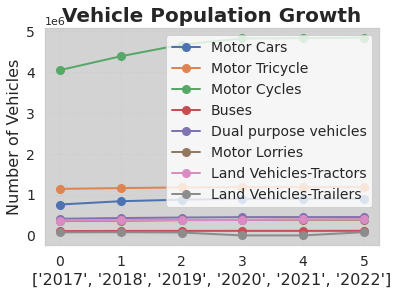

In [10]:
df_vehicle_growth = pd.read_excel('data/Other data.xlsx', sheet_name='vehicle_population')

years = ['2017', '2018', '2019', '2020', '2021', '2022']

# make all numeric columns int
numeric_columns = df_vehicle_growth.select_dtypes(include=[np.number]).columns.tolist()
for column in numeric_columns:
    df_vehicle_growth[column] = df_vehicle_growth[column].astype(int)
    
# drop last total row
df_vehicle_growth = df_vehicle_growth[:-1]

# index on Year column
df_vehicle_growth = df_vehicle_growth.set_index('Year')

df_vehicle_growth = df_vehicle_growth.T

df_vehicle_growth = df_vehicle_growth.reset_index()
#drop index column
df_vehicle_growth = df_vehicle_growth.drop(columns='index')



print(df_vehicle_growth.head(30))
df_vehicle_growth.info()

sns.set(style="whitegrid")

# Plot the DataFrame
plt.figure(figsize=(20, 10))
df_vehicle_growth.plot(kind='line', marker='o', markersize=8, linewidth=2)

# Title and labels
plt.title('Vehicle Population Growth', fontsize=20, fontweight='bold')
plt.ylabel('Number of Vehicles', fontsize=16)

plt.xlabel(years, fontsize=16)

# Customize grid and background color
plt.grid(True, linestyle='--', alpha=0.7)
plt.gca().set_facecolor('lightgrey')

# Customize legend
plt.legend(fontsize=14)
# drop legend
#plt.legend().remove()

# Customize tick labels
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.show()


Start Plotting

/tmp/ipykernel_269610/297411997.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_accidents_injured_summary_chart1['Total'] = df_accidents_injured_summary_chart1['2010'] + df_accidents_injured_summary_chart1['2011'] + df_accidents_injured_summary_chart1['2012']


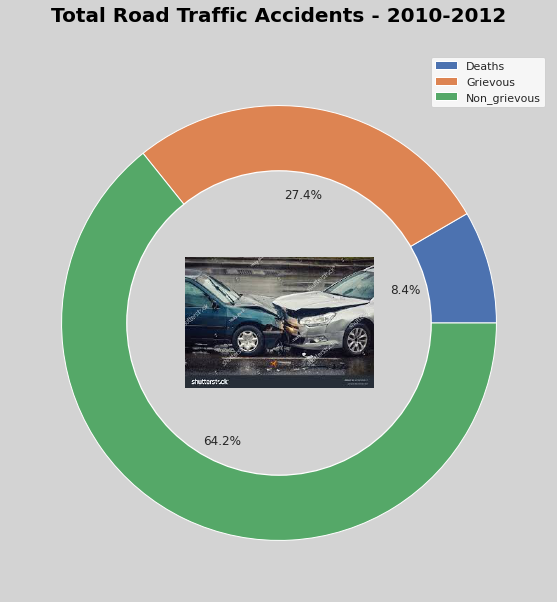

<Figure size 432x288 with 0 Axes>

In [13]:
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

#drop last row
df_accidents_injured_summary_chart1 = df_accidents_injured_summary.iloc[:-1]


df_accidents_injured_summary_chart1.head()


# create a new column for total for all 3 years
df_accidents_injured_summary_chart1['Total'] = df_accidents_injured_summary_chart1['2010'] + df_accidents_injured_summary_chart1['2011'] + df_accidents_injured_summary_chart1['2012']
df_accidents_injured_summary_chart1.head()

# plot pie chart for total using seaborn
plt.figure(figsize=(10, 10))
plt.pie(df_accidents_injured_summary_chart1['Total'], labels=None, autopct='%1.1f%%')
plt.title('Total Road Traffic Accidents - 2010-2012', fontsize=20, color='black', loc='center', pad=30, weight='bold')
plt.legend(df_accidents_injured_summary_chart1.index, loc='upper right')
plt.gcf().set_facecolor('lightgrey')


centre_circle = plt.Circle((0, 0), 0.70, color='white', fc='lightgrey', linewidth=1.25)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)


img = plt.imread('./images/accident.jpeg')  # Provide the path to your image
im = OffsetImage(img, zoom=0.7)  # Adjust zoom to resize the image
ab = AnnotationBbox(im, (0, 0), xycoords='data', frameon=False)
fig.gca().add_artist(ab)

plt.show()
plt.savefig('total_accidents_pie_chart.png')



In [ ]:
# create summary dfs from total columns in df_accidents_vehicles
df_accidents_vehicles_total = df_accidents_vehicles.tail(1)
df_accidents_vehicles_total = df_accidents_vehicles_total.drop(columns='Districts')
# drop index row
df_accidents_vehicles_total = df_accidents_vehicles_total.reset_index(drop=True)
#select columns to keep
df_accidents_vehicles_total = df_accidents_vehicles_total[['2010_Total', '2011_Total', '2012_Total']]

df_accidents_injured_total = df_accidents_injured_total[['2010_Total', '2011_Total', '2012_Total']]
df_accidents_vehicles_total.info()
df_accidents_vehicles_total.head(30)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   2010_Total  1 non-null      int64
 1   2011_Total  1 non-null      int64
 2   2012_Total  1 non-null      int64
dtypes: int64(3)
memory usage: 152.0 bytes


,2010_Total,2011_Total,2012_Total
0,62907,67335,61587


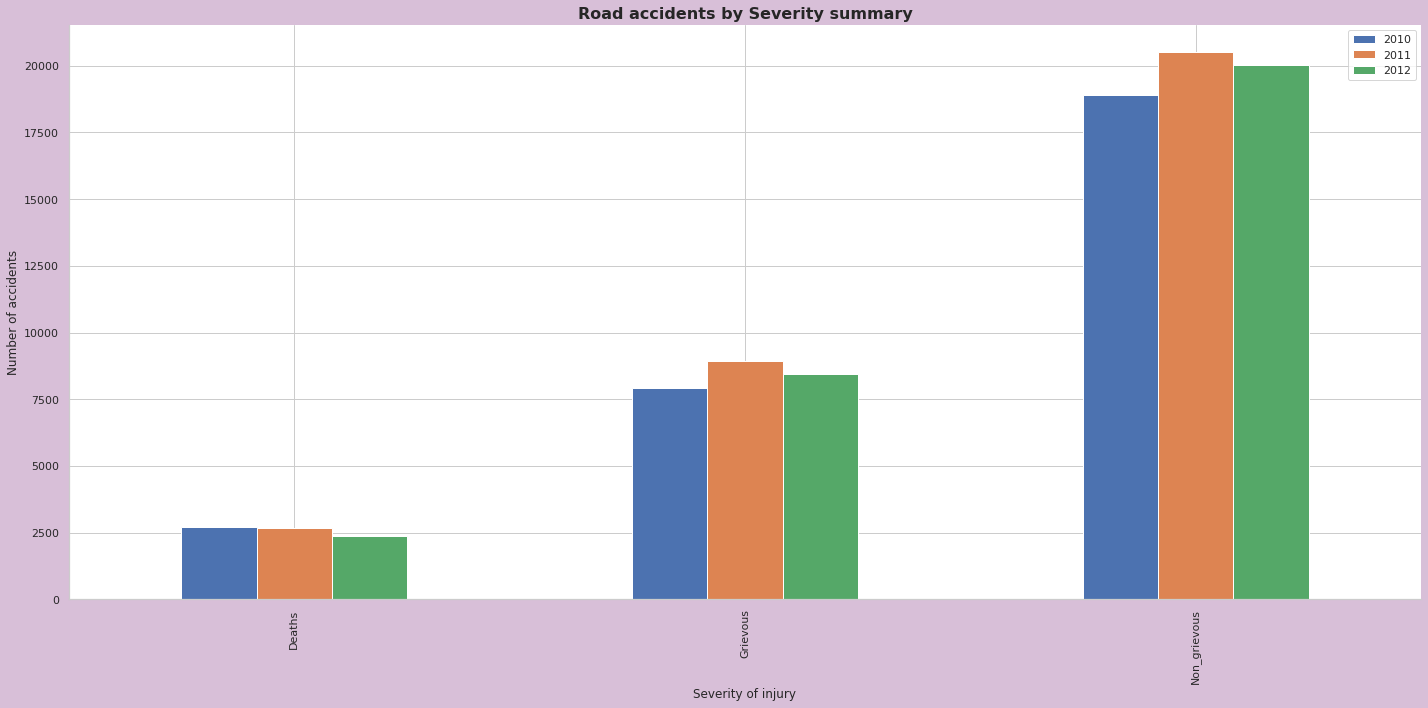

In [ ]:
# remove last row
df_accidents_injured_summary_barchart = df_accidents_injured_summary.iloc[:-1]

# Plot df_accidents_injured_summary in a bar chart using seaborn
sns.set(style="whitegrid")
df_accidents_injured_summary_barchart.plot(kind='bar', figsize=(20,10))
plt.title('Road accidents by Severity summary', fontsize=16, fontweight='bold')
plt.ylabel('Number of accidents')
plt.xlabel('Severity of injury')
plt.gcf().set_facecolor('thistle')

plt.tight_layout()
# remove white space from top and right
sns.despine()


plt.show()

